In [1]:
import wget
URL = "http://ovne.org/download/Customer-Churn-Records.csv"
response = wget.download(URL, "Customer-Churn-Records.csv")

100% [............................................................................] 837415 / 837415

In [2]:
import pandas as pd
df = pd.read_csv('Customer-Churn-Records.csv', header = 0, na_values ="NA", comment ='\t', sep=',', skipinitialspace = True)
df.drop(columns = ["RowNumber", "CustomerId", "Surname", "Complain", "Satisfaction Score", "Card Type","Point Earned" ], inplace = True)
X = df.drop(["Exited"], axis = 1)
y = df.Exited
dict = {'France':0, 'Germany':1, 'Spain': 2, 'Female':0, 'Male':1}
X.replace(dict, inplace = True)

In [3]:
#import all modules and functions
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
# split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size=0.20, random_state=43 )

In [6]:
# Create models
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [22]:
# Print the out-of-bag (OOB) error
oob_scores =  rf_clf.oob_score_

print(f"Out-of-Bag Score: {oob_scores:.4f}")

#print score on test set
y_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of test set is: {test_accuracy:.4f}")

Out-of-Bag Score: 0.8608
Accuracy of test set is: 0.8610


In [25]:

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
           Feature  Importance
3              Age    0.239530
9  EstimatedSalary    0.146551
0      CreditScore    0.144228
5          Balance    0.139156
6    NumOfProducts    0.131495
4           Tenure    0.082495
8   IsActiveMember    0.041832
1        Geography    0.037120
2           Gender    0.018924
7        HasCrCard    0.018669


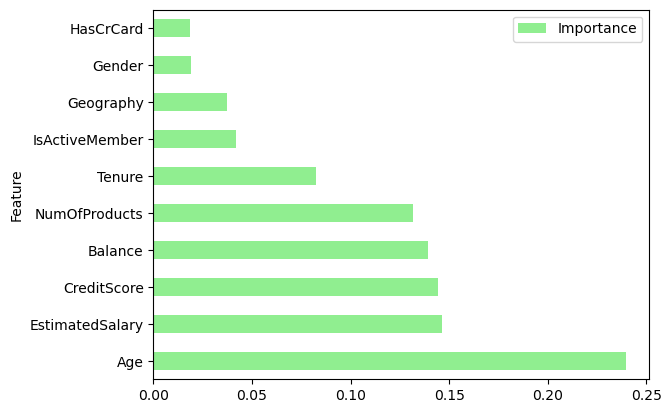

In [26]:
import matplotlib.pyplot as plt
importance_df.plot(kind="barh", x="Feature", y = "Importance", color = 'lightgreen')
plt.show()

In [24]:

X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')